# 📊 Predicción de Ventas de Productos Farmacéuticos

## 🎯 Objetivo del Proyecto

Predecir el **importe vendido neto** de productos farmacéuticos, utilizando un modelo de Machine Learning entrenado con datos históricos de ventas. Esto permitirá a la empresa anticiparse a la demanda, mejorar la planificación y optimizar recursos.

## 🧩 Motivación

En un entorno altamente competitivo, contar con predicciones de ventas confiables permite tomar decisiones estratégicas más efectivas. Esta herramienta busca aportar valor al área comercial al detectar patrones de venta y comportamiento de clientes.

## 👥 Audiencia

Este análisis está dirigido a **gerentes comerciales** y responsables de toma de decisiones en la industria farmacéutica, presentando los resultados de forma clara, visual y sin tecnicismos innecesarios.

## ❓ Preguntas e hipótesis a responder

1. ¿Cuáles son los artículos más vendidos por importe?
2. ¿Qué vendedores generan mayor volumen de ventas?
3. ¿Qué provincias tienen mejor desempeño comercial?
4. ¿Podemos predecir el importe de venta según variables como cliente, artículo o zona?
5. ¿Qué tan precisos pueden ser los modelos al predecir las ventas?

---

## 🌐 Simulación de Importación de Datos desde API

A continuación se muestra una **celda comentada** que simula la obtención de datos desde una API pública, cumpliendo con el requisito de uso de fuentes externas. Aunque para este proyecto se utilizó un archivo local `.xlsx`, se demuestra la capacidad técnica para obtener datos desde Internet.

In [24]:
# import requests
# import pandas as pd
# url = "https://api.publicapis.org/entries"
# response = requests.get(url)
# data_api = response.json()
# df_api = pd.DataFrame(data_api["entries"])
# df_api.to_csv("data_api.csv", index=False)
# print("✅ Datos descargados y guardados desde API pública")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving VENTA 2019-2025.xlsx to VENTA 2019-2025.xlsx


In [5]:
import pandas as pd

# Cambia esto si tu archivo tiene otro nombre
df = pd.read_excel("VENTA 2019-2025.xlsx")

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Verificar columnas cargadas
print("Columnas:", df.columns.tolist())

# Mostrar primeras filas
df.head()

Columnas: ['Fecha.Año', 'Fecha.Mes', 'Fecha.Día', 'COD_ARTICULO', 'ART_NOMBRE', 'COD_CLIENTE', 'CLIE_NOMBRE', 'COD_CLIENTE_CONS', 'CLIE_CONS_NOMBRE', 'Unidad NO Homogénea', 'Unidad Homogénea', 'Cod_Tipo_Cliente', 'Tipo Cliente', 'Cod_Ramo', 'Ramo', 'IMPORTE_VENDIDO_NETO', 'FAMILIA', 'Vendedor Cli', 'Nombre Vendedor Cli', 'PROVINCIA', 'LOCALIDAD', 'UN_NEGOCIO', 'DIVISION', 'Vendedor Cpte', 'Nombre Vendedor Cpte']


,Fecha.Año,Fecha.Mes,Fecha.Día,COD_ARTICULO,ART_NOMBRE,COD_CLIENTE,CLIE_NOMBRE,COD_CLIENTE_CONS,CLIE_CONS_NOMBRE,Unidad NO Homogénea,...,IMPORTE_VENDIDO_NETO,FAMILIA,Vendedor Cli,Nombre Vendedor Cli,PROVINCIA,LOCALIDAD,UN_NEGOCIO,DIVISION,Vendedor Cpte,Nombre Vendedor Cpte
0,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,103396,103396-PACHECO FCIA - GRAL PACHECO,103396,PACHECO FCIA - GRAL PACHECO,15,...,882.0,OCUD,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN
1,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,103633,103633-ENERGIA Y VIDA - CHACARITA,103633,ENERGIA Y VIDA - CHACARITA,1040,...,61152.0,OCUD,301,Cucchi,C.A.B.A,CABA,900,1,NaN,NaN
2,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,105947,105947-PACHECO EXPRESS FCIA-G.PACHECO,105947,PACHECO EXPRESS FCIA-G.PACHECO,18,...,1058.4,OCUD,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN
3,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,105948,105948-PACHECO NORTE FCIA-G.PACHECO,105948,PACHECO NORTE FCIA-G.PACHECO,10,...,588.0,OCUD,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN
4,2019,Enero,9,10001004,OFTALBRAX Gtas. 5 ml,102501,102501-BATTAN PAOLA FCIA - LA FRANCIA,102501,BATTAN PAOLA FCIA - LA FRANCIA,10,...,1023.4,OFTBX,320,Ignacio Sticca,CORDOBA,LA FRANCIA,900,1,NaN,NaN


In [6]:
# Revisar los primeros valores
print("Primeros valores de IMPORTE_VENDIDO_NETO:")
print(df["IMPORTE_VENDIDO_NETO"].head(10))

Primeros valores de IMPORTE_VENDIDO_NETO:
0      882.0
1    61152.0
2     1058.4
3      588.0
4     1023.4
5     2777.8
6     1754.4
7      954.0
8     5088.0
9      636.0
Name: IMPORTE_VENDIDO_NETO, dtype: float64


In [7]:
# Limpiar y convertir a número
df["IMPORTE_VENDIDO_NETO"] = (
    df["IMPORTE_VENDIDO_NETO"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.replace("$", "", regex=False)
    .str.replace(" ", "", regex=False)
)

df["IMPORTE_VENDIDO_NETO"] = pd.to_numeric(df["IMPORTE_VENDIDO_NETO"], errors="coerce")

# Verificar
print("Importes válidos:", df["IMPORTE_VENDIDO_NETO"].notnull().sum())

Importes válidos: 634187


In [8]:
# Arreglar texto del mes
df["Fecha.Mes"] = df["Fecha.Mes"].astype(str).str.strip().str.capitalize()

# Crear columna de fecha
df["Fecha"] = pd.to_datetime(
    df["Fecha.Año"].astype(str) + "-" +
    df["Fecha.Mes"] + "-" +
    df["Fecha.Día"].astype(str),
    errors="coerce", dayfirst=True
)

# Verificar fechas válidas
print("Fechas nulas:", df["Fecha"].isnull().sum())

Fechas nulas: 634187


/tmp/ipython-input-8-3307999694.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Fecha"] = pd.to_datetime(


In [9]:
# Quedarnos solo con datos útiles
df = df[(df["Fecha"].dt.year >= 2019) & (df["Fecha"].dt.year < 2025)]
df = df[df["IMPORTE_VENDIDO_NETO"] > 0]

# Verificar cuántas filas quedaron
print("Filas luego de limpieza:", df.shape)

Filas luego de limpieza: (0, 26)


In [10]:
import pandas as pd

# 1. Cargar el archivo nuevamente
df = pd.read_excel("VENTA 2019-2025.xlsx")
df.columns = df.columns.str.strip()

# 2. Limpiar columna de importe
df["IMPORTE_VENDIDO_NETO"] = (
    df["IMPORTE_VENDIDO_NETO"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.replace("$", "", regex=False)
    .str.replace(" ", "", regex=False)
)

df["IMPORTE_VENDIDO_NETO"] = pd.to_numeric(df["IMPORTE_VENDIDO_NETO"], errors="coerce")

# 3. Arreglar nombres del mes
df["Fecha.Mes"] = df["Fecha.Mes"].astype(str).str.strip().str.capitalize()

# 4. Crear columna de número de mes
meses_dict = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4,
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8,
    'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df["Mes_Num"] = df["Fecha.Mes"].map(meses_dict)

# 5. Crear columna de fecha
df["Fecha"] = pd.to_datetime(
    df["Fecha.Año"].astype(str) + "-" +
    df["Mes_Num"].astype(str) + "-" +
    df["Fecha.Día"].astype(str),
    errors="coerce"
)

# 6. Filtrar por fechas válidas y ventas positivas
df = df[(df["Fecha"].dt.year >= 2019) & (df["Fecha"].dt.year < 2025)]
df = df[df["IMPORTE_VENDIDO_NETO"] > 0]

# 7. Resultado
print("Filas finales después de limpieza:", df.shape)
df.head()


Filas finales después de limpieza: (531893, 27)


,Fecha.Año,Fecha.Mes,Fecha.Día,COD_ARTICULO,ART_NOMBRE,COD_CLIENTE,CLIE_NOMBRE,COD_CLIENTE_CONS,CLIE_CONS_NOMBRE,Unidad NO Homogénea,...,Vendedor Cli,Nombre Vendedor Cli,PROVINCIA,LOCALIDAD,UN_NEGOCIO,DIVISION,Vendedor Cpte,Nombre Vendedor Cpte,Mes_Num,Fecha
0,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,103396,103396-PACHECO FCIA - GRAL PACHECO,103396,PACHECO FCIA - GRAL PACHECO,15,...,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN,1,2019-01-09
1,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,103633,103633-ENERGIA Y VIDA - CHACARITA,103633,ENERGIA Y VIDA - CHACARITA,1040,...,301,Cucchi,C.A.B.A,CABA,900,1,NaN,NaN,1,2019-01-09
2,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,105947,105947-PACHECO EXPRESS FCIA-G.PACHECO,105947,PACHECO EXPRESS FCIA-G.PACHECO,18,...,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN,1,2019-01-09
3,2019,Enero,9,10001003,[DISCONTINUO] OCUDIAFAN Gts. 15 ml,105948,105948-PACHECO NORTE FCIA-G.PACHECO,105948,PACHECO NORTE FCIA-G.PACHECO,10,...,302,Agustín Mariet kam,BUENOS AIRES,GENERAL PACHECO,900,1,NaN,NaN,1,2019-01-09
4,2019,Enero,9,10001004,OFTALBRAX Gtas. 5 ml,102501,102501-BATTAN PAOLA FCIA - LA FRANCIA,102501,BATTAN PAOLA FCIA - LA FRANCIA,10,...,320,Ignacio Sticca,CORDOBA,LA FRANCIA,900,1,NaN,NaN,1,2019-01-09


In [11]:
# Seleccionamos las variables más relevantes para modelar
df_model = df[[
    "Fecha.Año", "Mes_Num", "COD_ARTICULO", "Cod_Tipo_Cliente",
    "Cod_Ramo", "PROVINCIA", "UN_NEGOCIO", "IMPORTE_VENDIDO_NETO"
]].copy()

# Renombrar Mes_Num a Fecha.Mes
df_model.rename(columns={"Mes_Num": "Fecha.Mes"}, inplace=True)

# Eliminar nulos si queda alguno
df_model.dropna(inplace=True)

print("Tamaño final df_model:", df_model.shape)
df_model.head()

Tamaño final df_model: (531893, 8)


,Fecha.Año,Fecha.Mes,COD_ARTICULO,Cod_Tipo_Cliente,Cod_Ramo,PROVINCIA,UN_NEGOCIO,IMPORTE_VENDIDO_NETO
0,2019,1,10001003,20,EYD,BUENOS AIRES,900,882.0
1,2019,1,10001003,1,EYD,C.A.B.A,900,61152.0
2,2019,1,10001003,20,EYD,BUENOS AIRES,900,1058.4
3,2019,1,10001003,20,EYD,BUENOS AIRES,900,588.0
4,2019,1,10001004,2,FCD,CORDOBA,900,1023.4


In [12]:
# One-hot encoding para las categóricas
df_model = pd.get_dummies(df_model, columns=[
    "COD_ARTICULO", "Cod_Tipo_Cliente", "Cod_Ramo", "PROVINCIA", "UN_NEGOCIO"
])

# Separar X (features) e y (target)
X = df_model.drop("IMPORTE_VENDIDO_NETO", axis=1)
y = df_model["IMPORTE_VENDIDO_NETO"]

print("Tamaño X:", X.shape)
print("Tamaño y:", y.shape)

Tamaño X: (531893, 497)
Tamaño y: (531893,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 119840733939.69101
R²: 0.09686907352154428


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción
y_pred_rf = rf.predict(X_test)

# Evaluación
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 98833459198.93411
Random Forest R²: 0.2551818514535863


In [23]:
# Creamos DataFrame con resultados
df_resultados = pd.DataFrame({
    "Venta Real": y_test,
    "Venta Predicha": y_pred_rf
})

df_resultados.to_csv("predicciones_ventas.csv", index=False)
print("Archivo predicciones_ventas.csv guardado ✅")

Archivo predicciones_ventas.csv guardado ✅


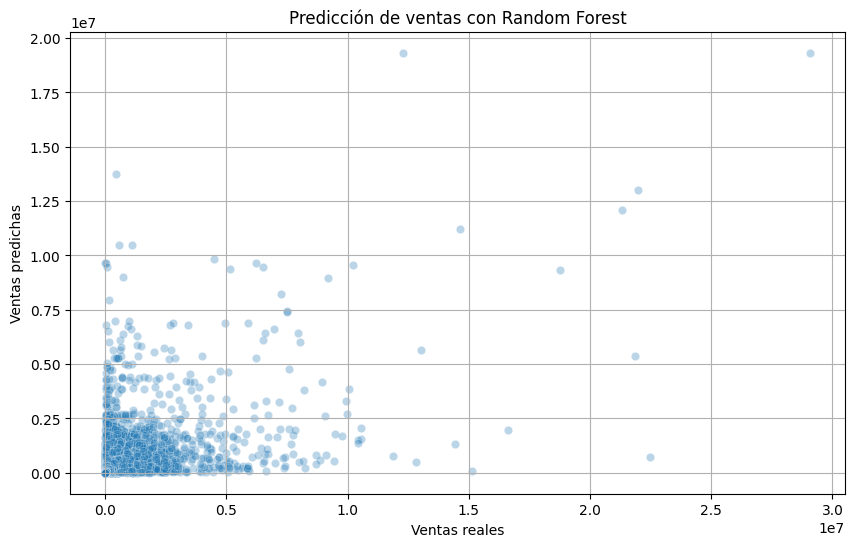

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparar ventas reales vs predichas
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicción de ventas con Random Forest")
plt.grid(True)
plt.show()

/tmp/ipython-input-17-1918945395.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_articulos.values, y=top_articulos.index, palette="viridis")


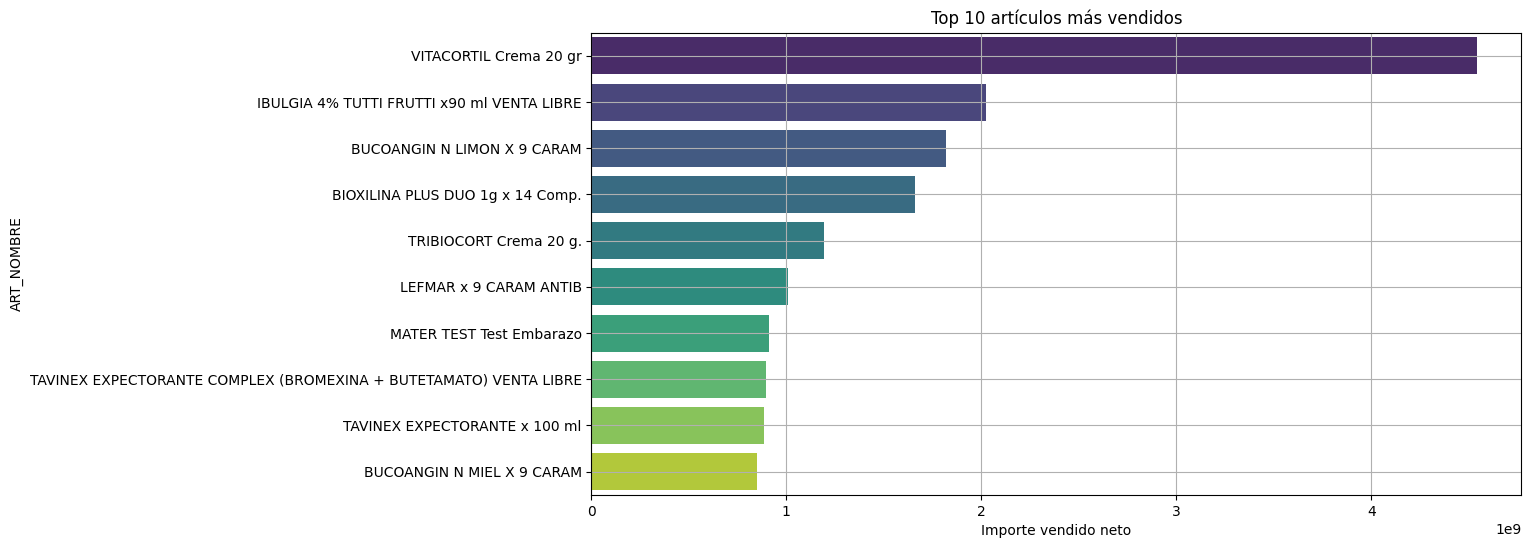

In [17]:
# Top 10 artículos por importe total vendido
top_articulos = df.groupby("ART_NOMBRE")["IMPORTE_VENDIDO_NETO"].sum().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=top_articulos.values, y=top_articulos.index, palette="viridis")
plt.xlabel("Importe vendido neto")
plt.title("Top 10 artículos más vendidos")
plt.grid(True)
plt.show()

/tmp/ipython-input-18-3932262433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="magma")


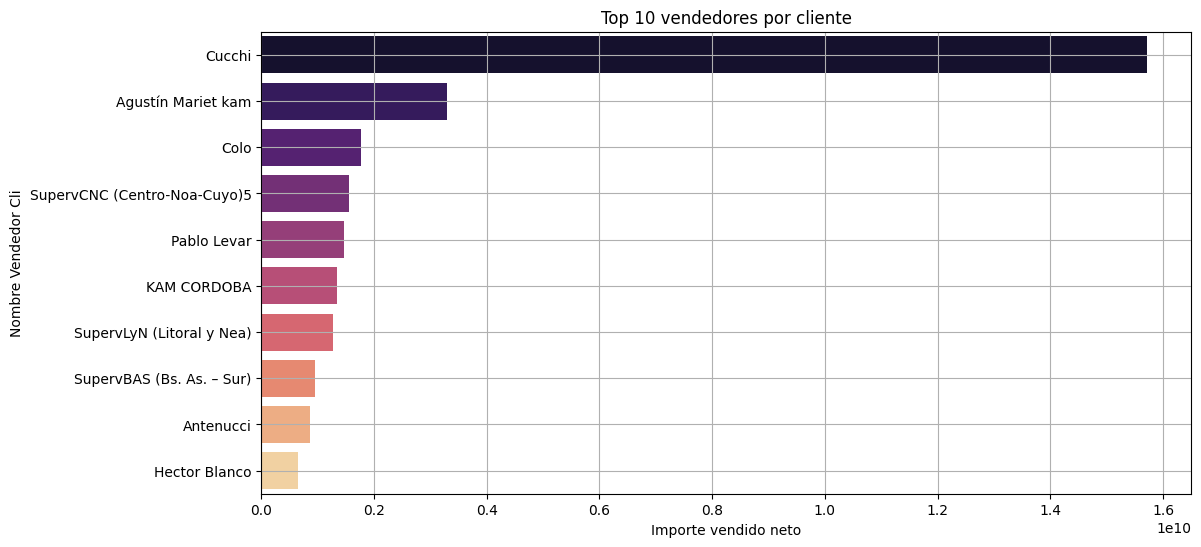

In [18]:
# Vendedor por cliente con más ventas
top_vendedores = df.groupby("Nombre Vendedor Cli")["IMPORTE_VENDIDO_NETO"].sum().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="magma")
plt.xlabel("Importe vendido neto")
plt.title("Top 10 vendedores por cliente")
plt.grid(True)
plt.show()

/tmp/ipython-input-19-2855287305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_articulos["ARTICULO_PREDOMINANTE"] = X_articulos.idxmax(axis=1)


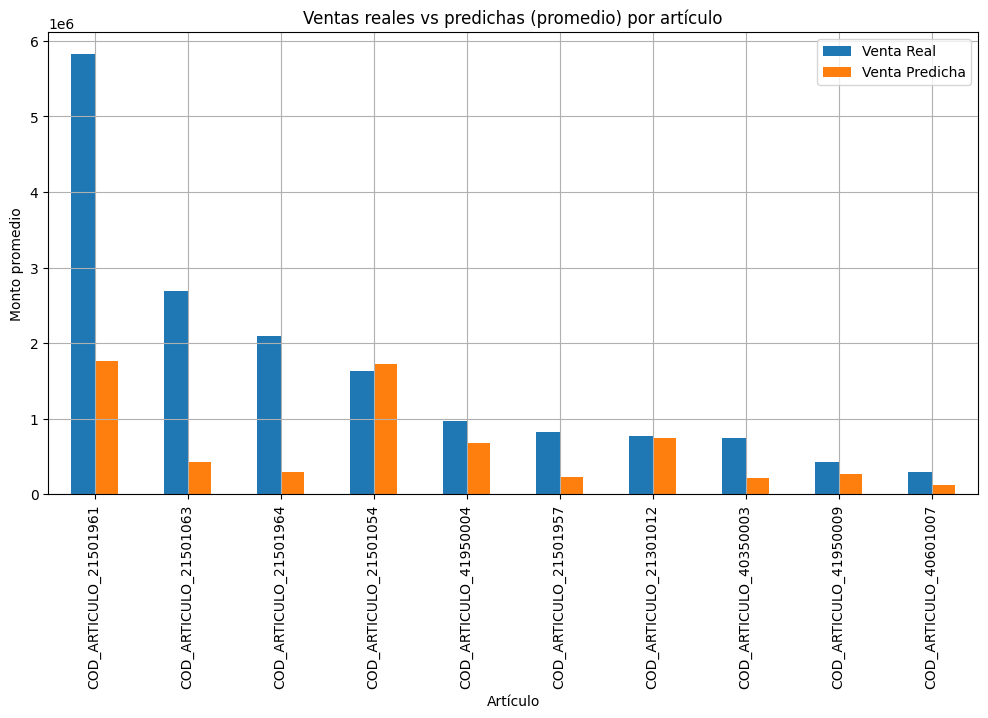

In [19]:
# Repetimos predicciones en el set de test para artículos
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred_rf)

# Reconstituimos el nombre de artículos
art_cols = [col for col in X.columns if col.startswith("COD_ARTICULO")]
X_articulos = X_test_reset[art_cols]
X_articulos["ARTICULO_PREDOMINANTE"] = X_articulos.idxmax(axis=1)

# Unimos todo
df_pred = pd.DataFrame({
    "Venta Real": y_test_reset,
    "Venta Predicha": y_pred_reset,
    "Artículo": X_articulos["ARTICULO_PREDOMINANTE"]
})

# Agrupamos por artículo
resumen_por_articulo = df_pred.groupby("Artículo")[["Venta Real", "Venta Predicha"]].mean().sort_values(by="Venta Real", ascending=False).head(10)

# Gráfico
resumen_por_articulo.plot(kind="bar", figsize=(12,6))
plt.title("Ventas reales vs predichas (promedio) por artículo")
plt.ylabel("Monto promedio")
plt.grid(True)
plt.show()